In [70]:
import wrangle
import explore
import model
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.api import Holt, ExponentialSmoothing


from sklearn.metrics import mean_squared_error
from math import sqrt 

import matplotlib.image as image

# Airline Delay Predictions

## Choose your Airline

Source: https://aspm.faa.gov/aspmhelp/index/ASQP___Carrier_Codes_And_Names.html

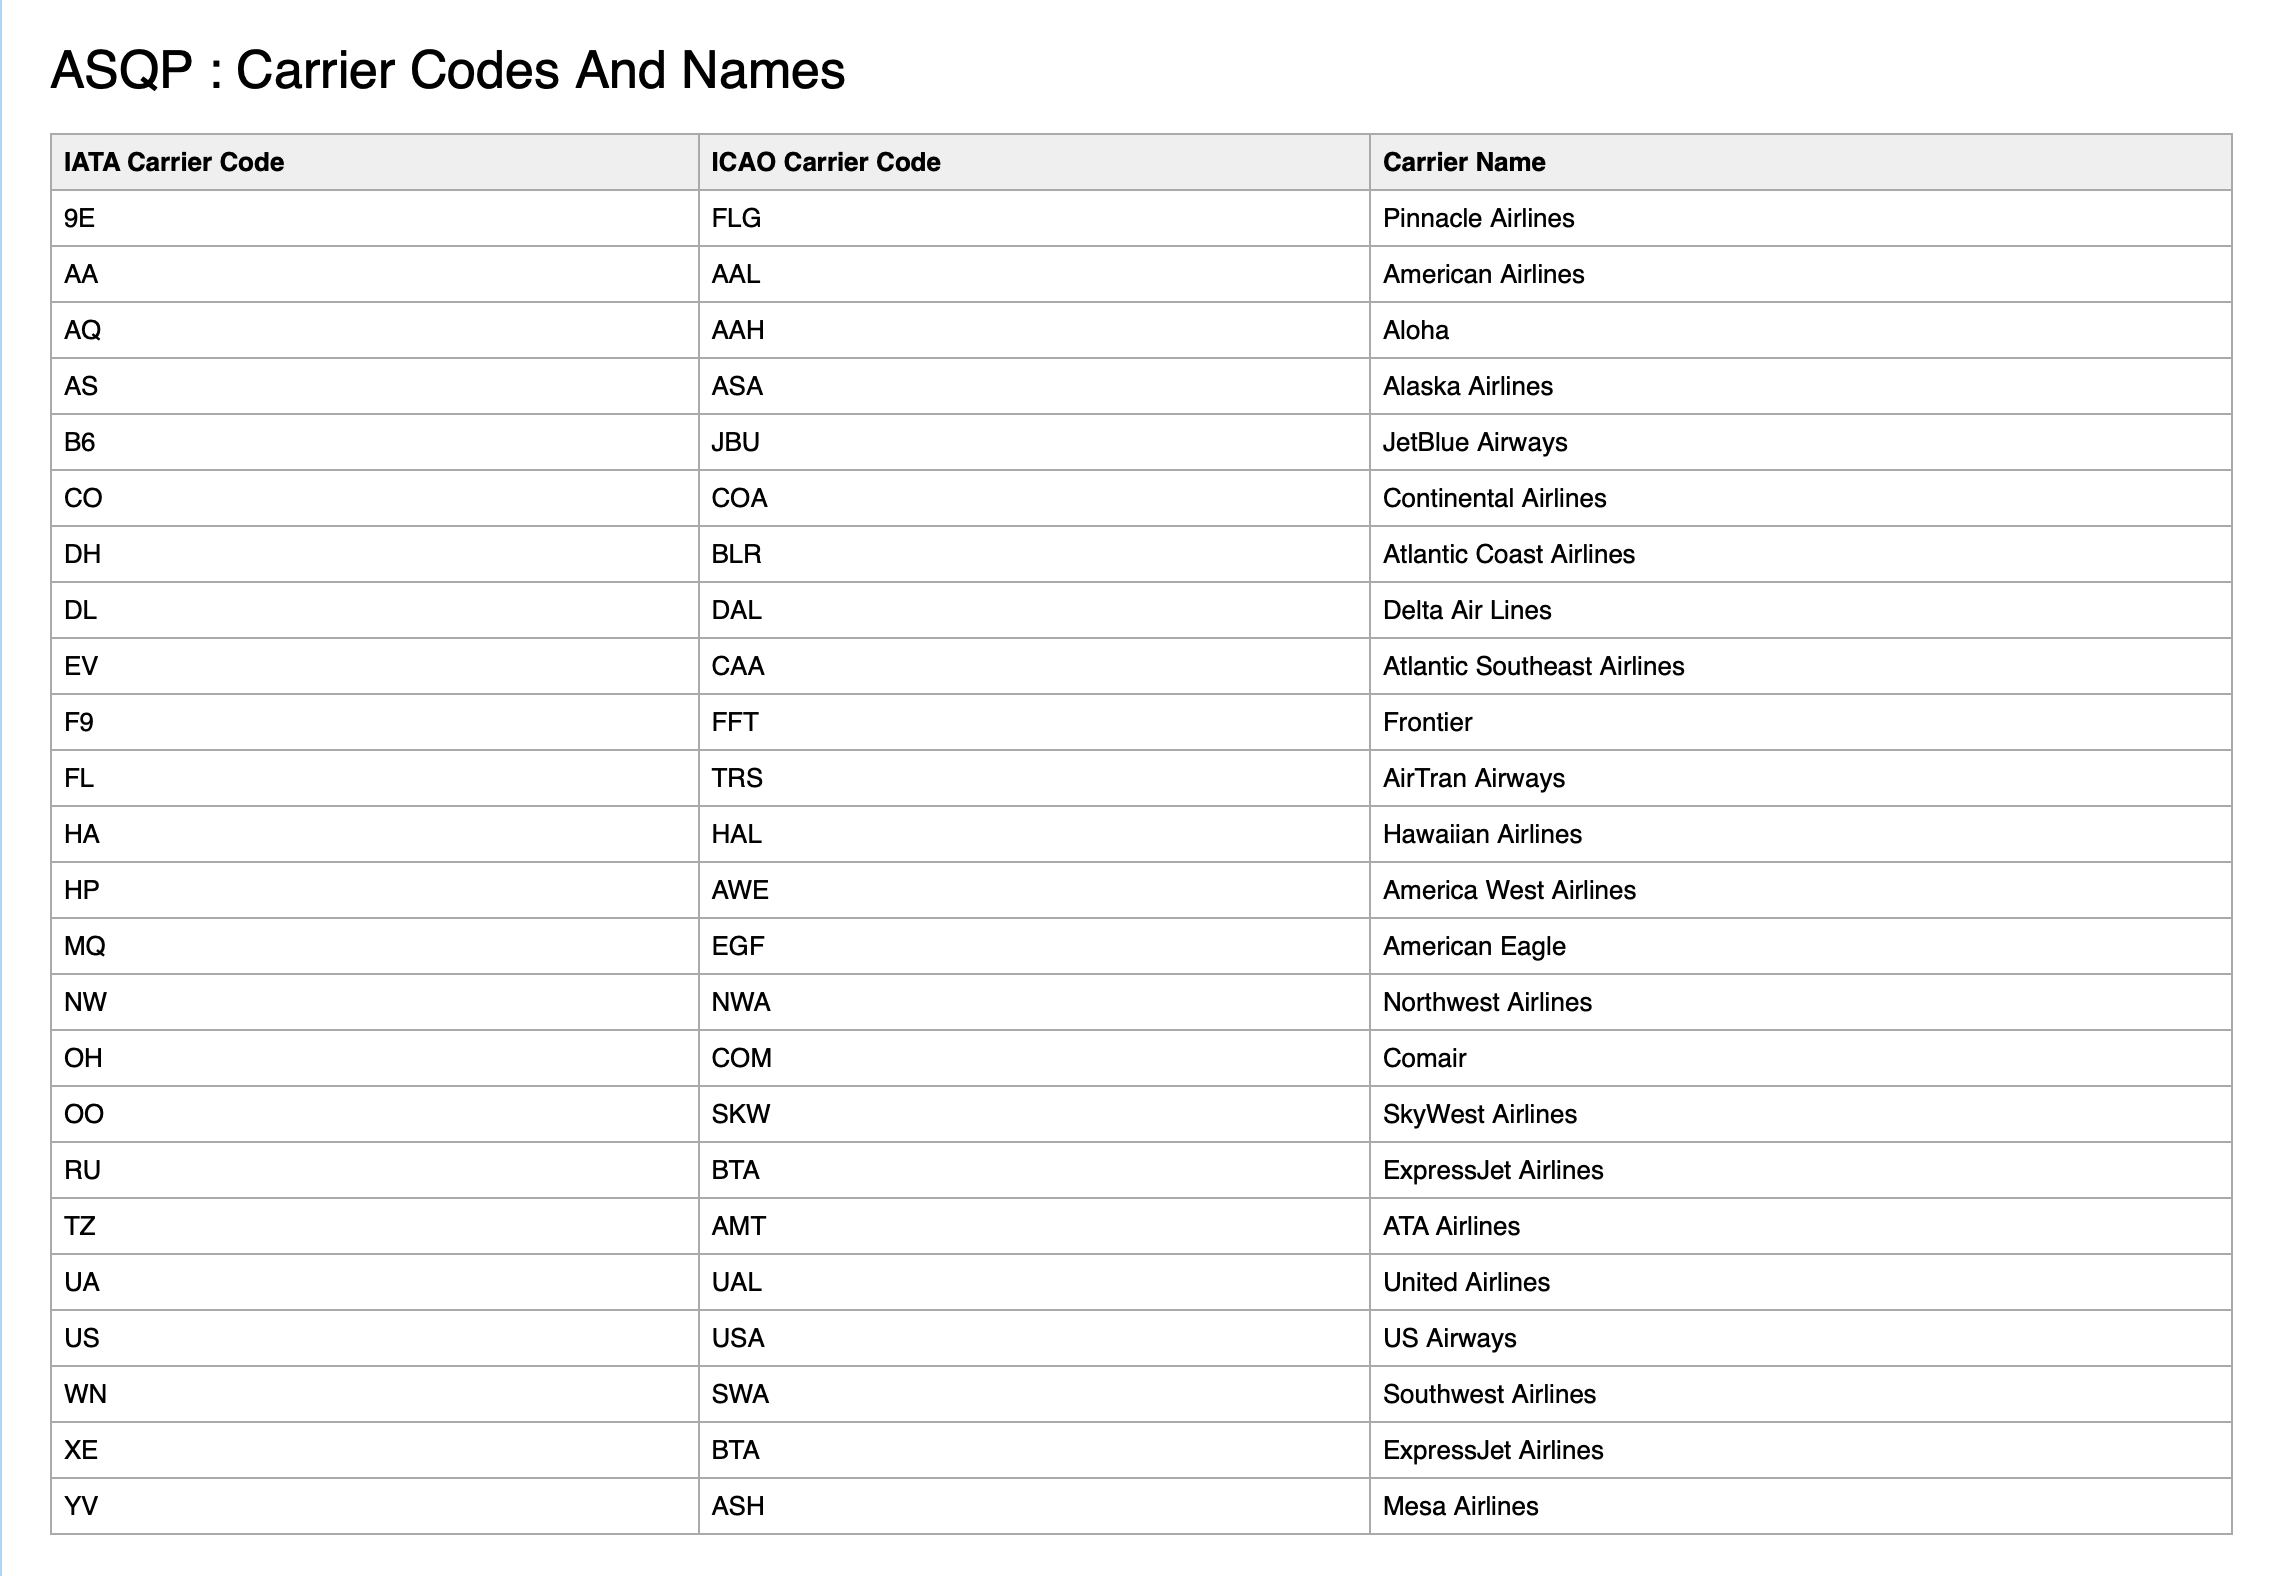

## Pull data from 10 csv's selecting the 7 columns shown out of 28 and specific to the airline passed in as the variable

Source: https://www.kaggle.com/datasets/sherrytp/airline-delay-analysis

In [71]:
flights = wrangle.pull_airline_data('DL')
flights

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
0,2009-01-01,DL,4,JFK,MCO,0.0,0.0,0.0,0.0,92.0,92.0
1,2009-01-01,DL,8,IAH,ATL,0.0,0.0,0.0,0.0,264.0,264.0
2,2009-01-01,DL,25,ATL,LAS,26.0,0.0,0.0,0.0,0.0,26.0
3,2009-01-01,DL,35,ATL,MCO,20.0,0.0,7.0,0.0,0.0,27.0
4,2009-01-01,DL,57,ATL,IAH,0.0,0.0,16.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
611677,2019-12-31,DL,2828,JFK,ATL,0.0,0.0,0.0,0.0,29.0,29.0
611678,2019-12-31,DL,2855,SEA,ANC,21.0,0.0,0.0,0.0,0.0,21.0
611679,2019-12-31,DL,2876,SEA,AUS,0.0,0.0,0.0,0.0,22.0,22.0
611680,2019-12-31,DL,2914,DFW,DTW,39.0,0.0,0.0,0.0,0.0,39.0


In [72]:
flights

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
0,2009-01-01,DL,4,JFK,MCO,0.0,0.0,0.0,0.0,92.0,92.0
1,2009-01-01,DL,8,IAH,ATL,0.0,0.0,0.0,0.0,264.0,264.0
2,2009-01-01,DL,25,ATL,LAS,26.0,0.0,0.0,0.0,0.0,26.0
3,2009-01-01,DL,35,ATL,MCO,20.0,0.0,7.0,0.0,0.0,27.0
4,2009-01-01,DL,57,ATL,IAH,0.0,0.0,16.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
611677,2019-12-31,DL,2828,JFK,ATL,0.0,0.0,0.0,0.0,29.0,29.0
611678,2019-12-31,DL,2855,SEA,ANC,21.0,0.0,0.0,0.0,0.0,21.0
611679,2019-12-31,DL,2876,SEA,AUS,0.0,0.0,0.0,0.0,22.0,22.0
611680,2019-12-31,DL,2914,DFW,DTW,39.0,0.0,0.0,0.0,0.0,39.0


## Clean dataset imputing 0 for nulls as they represent no delay and combining all delays into one column AND then averaging the delay by day

In [73]:
flights_daily_mean = wrangle.clean_flight_data_for_average_daily_delay(flights)
flights_daily_mean

,average_delay
FL_DATE,
2009-01-01,45.603175
2009-01-02,50.826241
2009-01-03,68.960526
2009-01-04,42.671587
2009-01-05,34.311475
...,...
2019-12-27,36.687075
2019-12-28,54.619048
2019-12-29,47.022346


## Plot average by varying time intervals

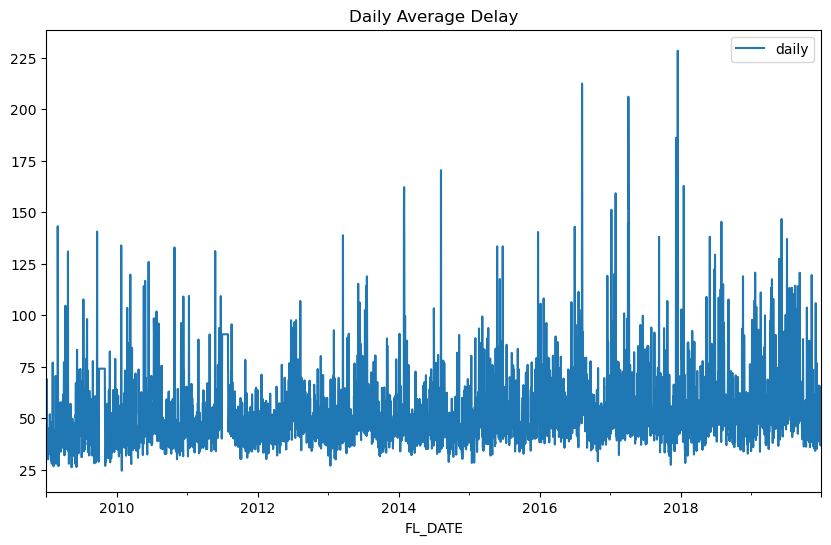

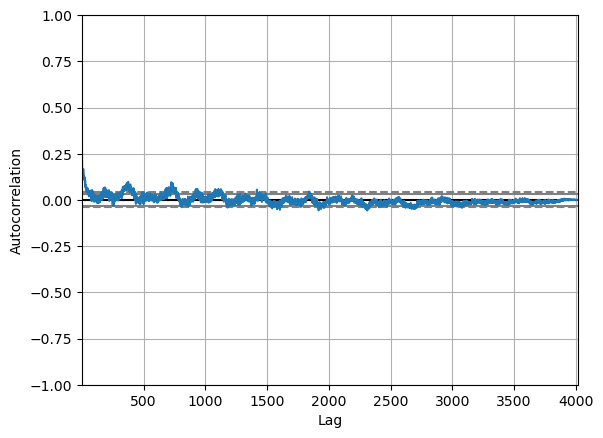

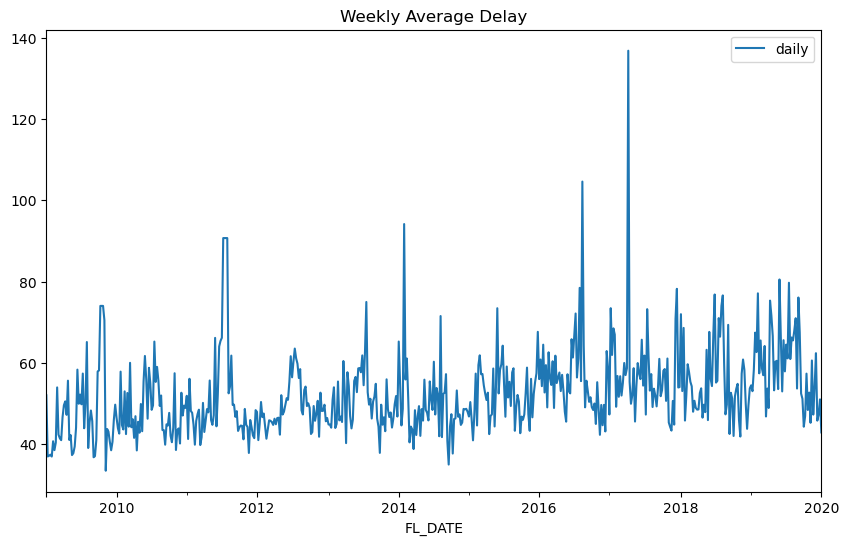

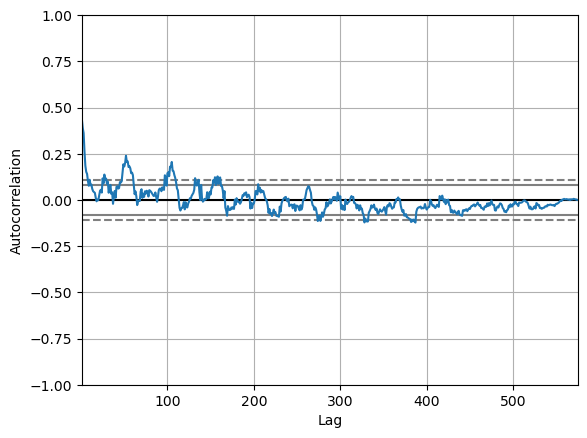

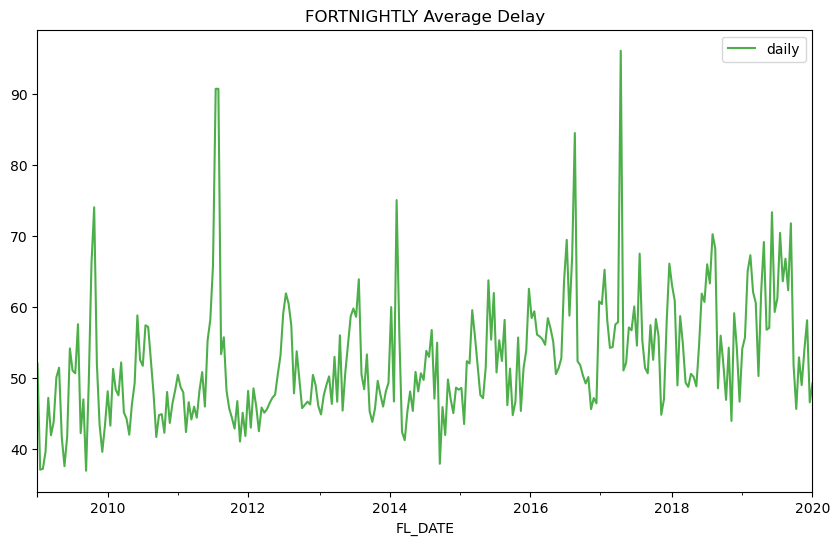

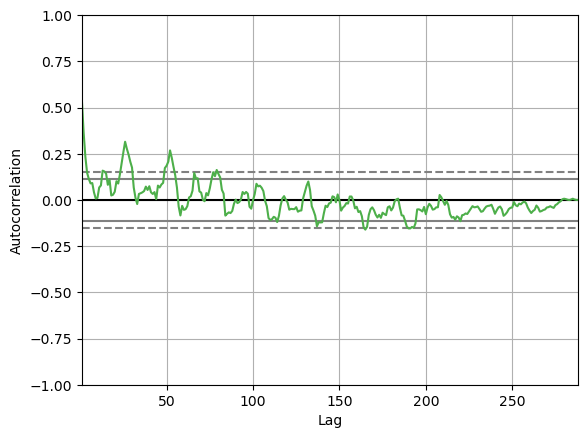

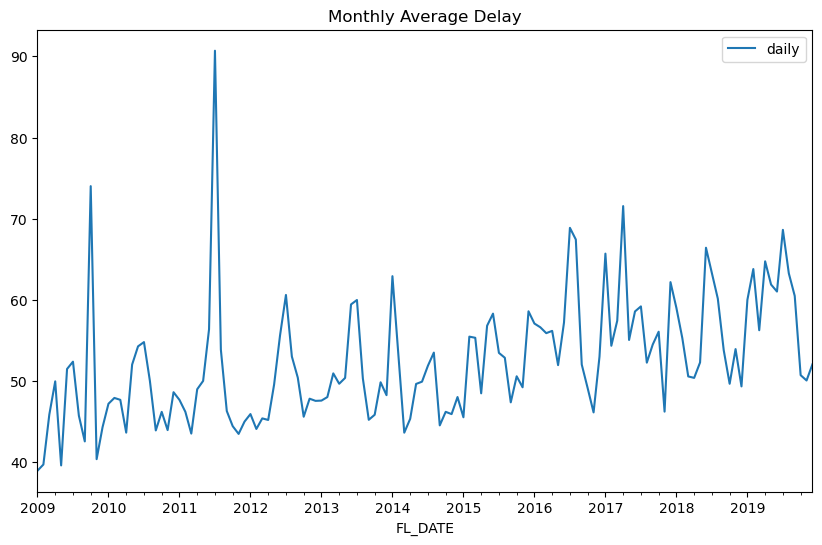

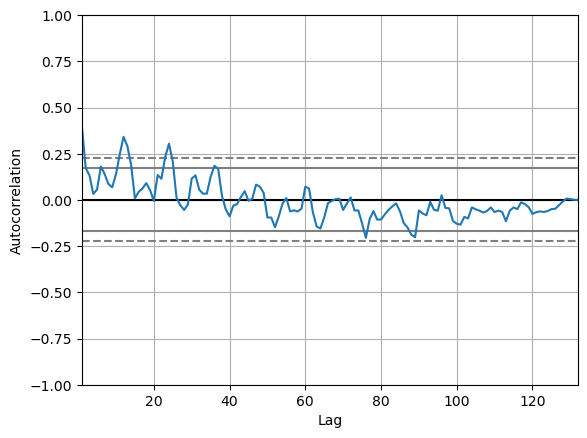

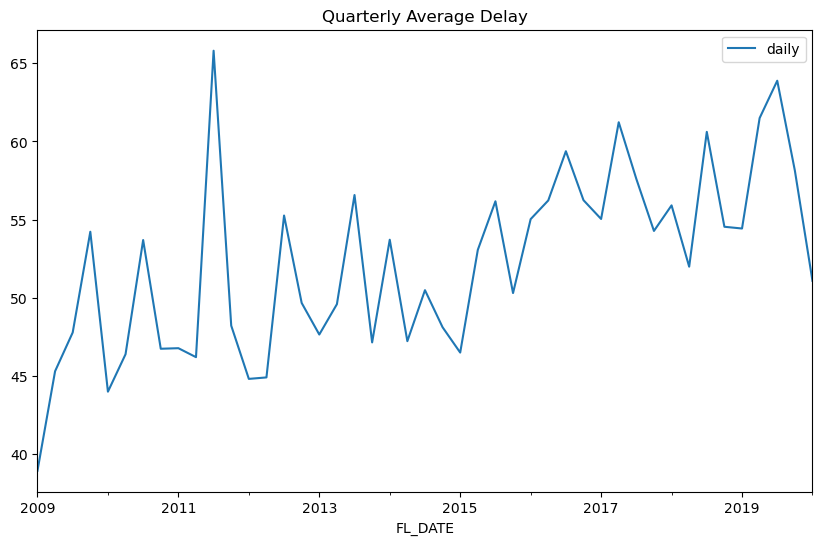

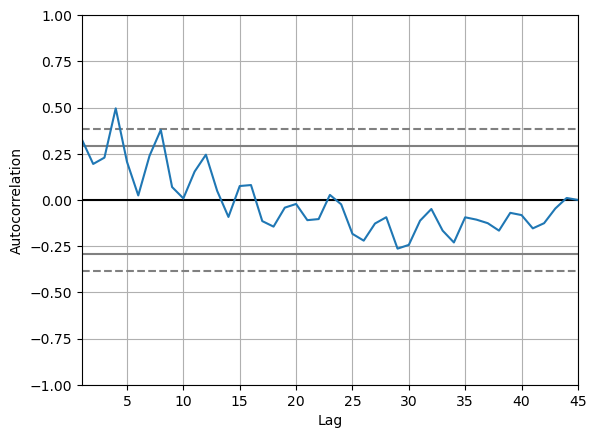

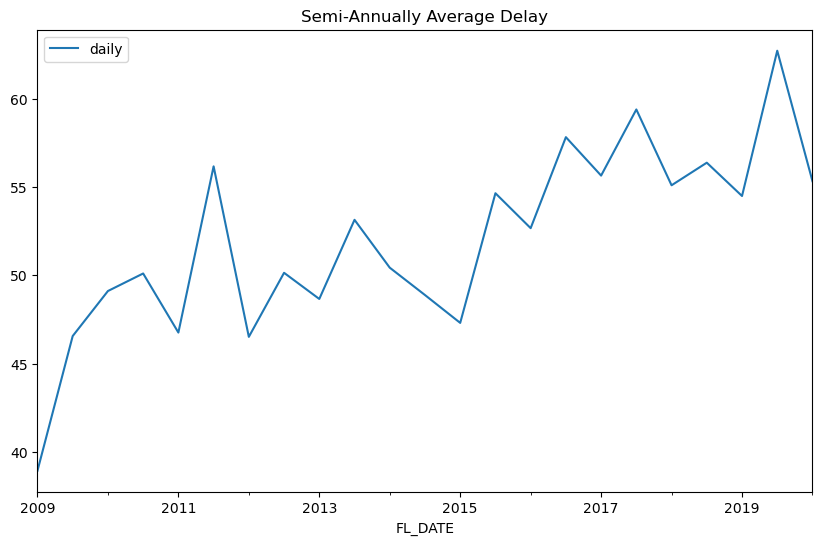

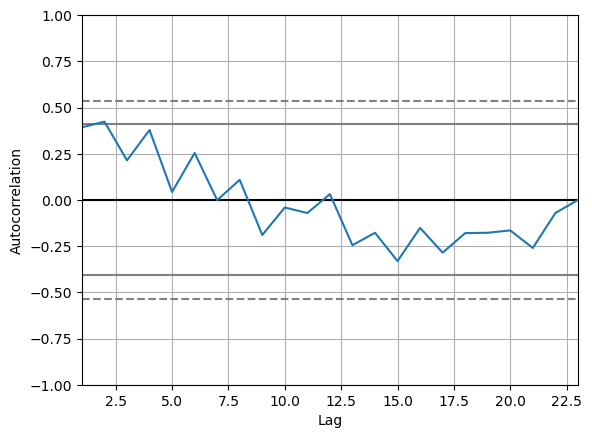

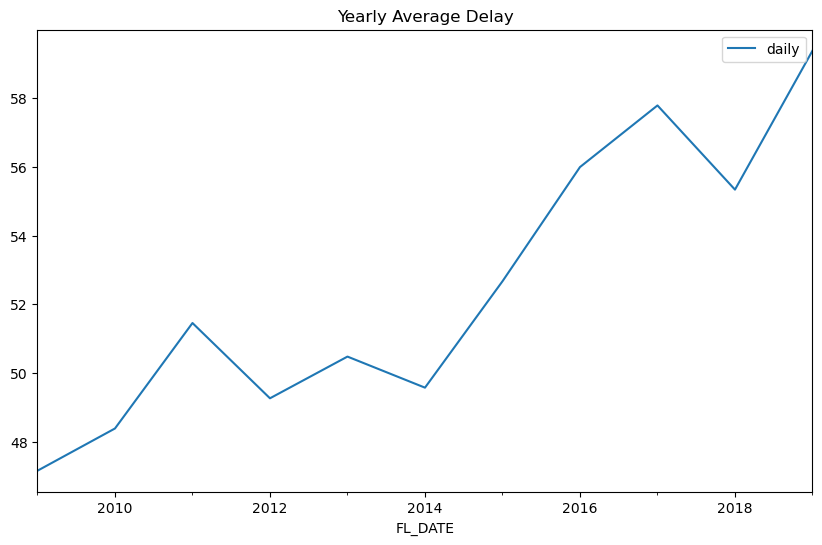

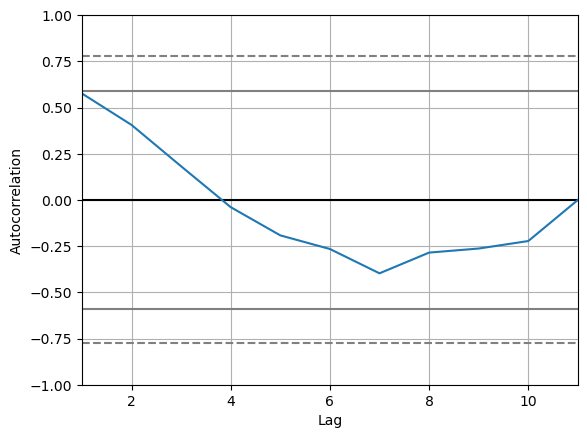

In [74]:
explore.plot_average_by_interval(flights_daily_mean)

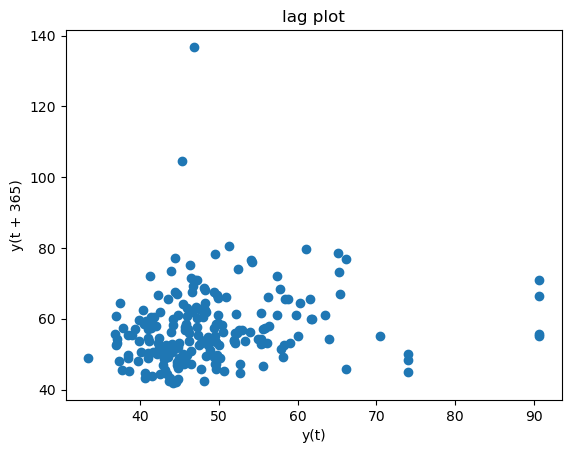

In [75]:
explore.plot_best_lag_plot(flights_daily_mean)

## Split

In [76]:
train, validate, test = model.train_test_split(flights_daily_mean, '2W')

In [77]:
train

,average_delay
FL_DATE,
2009-01-04,52.015382
2009-01-18,37.059657
2009-02-01,37.188468
2009-02-15,39.623670
2009-03-01,47.173721
...,...
2016-10-30,50.107933
2016-11-13,45.587392
2016-11-27,47.149823


In [96]:
print(f'The average of the average delays is {train.mean()[0]:.2f} minutes')

The average of the average delays is 50.63 minutes


## Plot the split

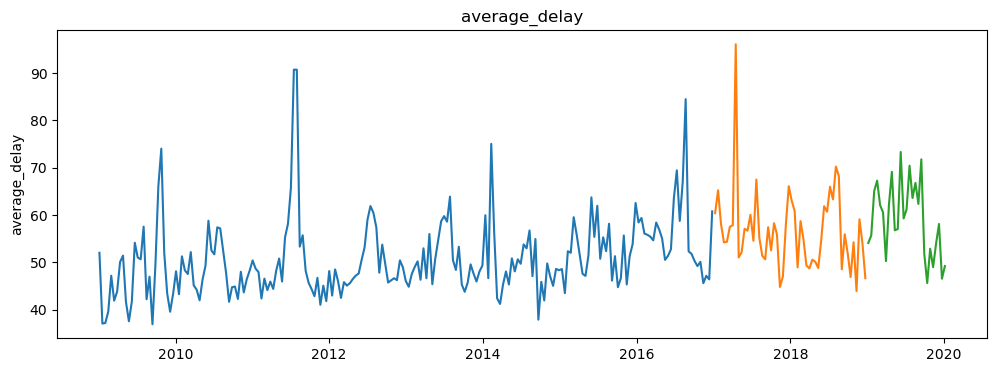

In [78]:
model.graph_split(train, validate, test)

## Seasonal Decomposition

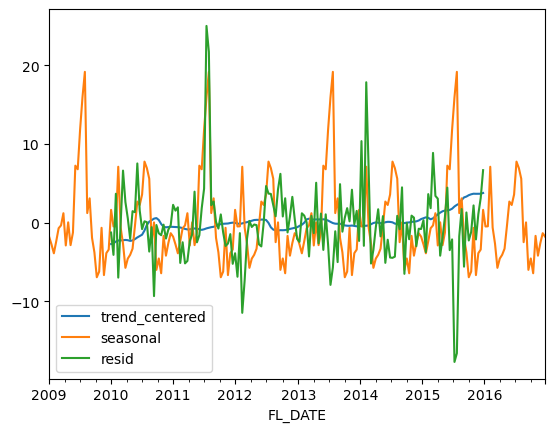

In [79]:
explore.seasonal_decomposition_plot(train, '2W')

## Baselines

In [80]:
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
yhat_df = pd.DataFrame(columns=['average_delay'])

### Last Average

average_delay -- RMSE: 9


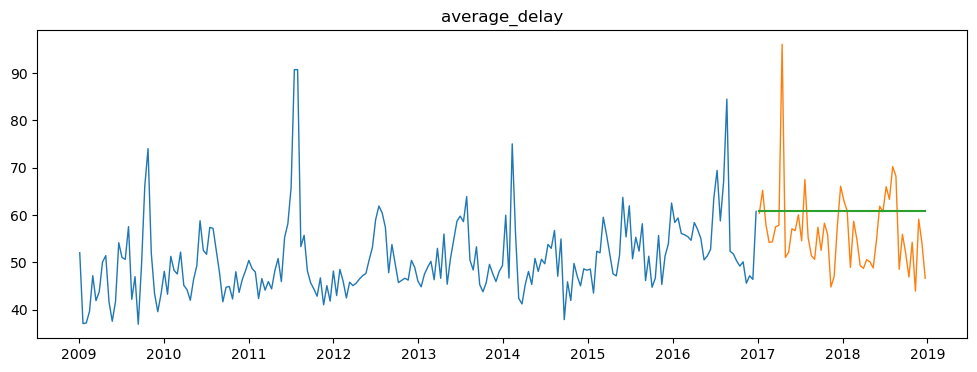

,model_type,target_var,rmse
0,last_observed_value,average_delay,9.33


In [81]:
eval_df = model.last_average_baseline(train, validate, yhat_df, eval_df)
eval_df

### Total Average

average_delay -- RMSE: 10


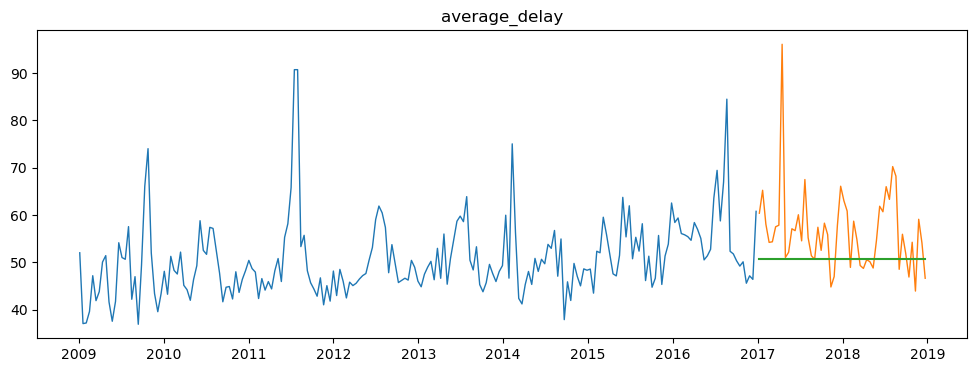

,model_type,target_var,rmse
0,last_observed_value,average_delay,9.33
0,average_of_all_test_means,average_delay,10.19


In [82]:
eval_df = model.total_average_baseline(train, validate, yhat_df, eval_df)
eval_df

### Rolling Average

In [83]:
eval_df = model.rolling_average_baselines(train, validate, yhat_df, eval_df)
eval_df

,model_type,target_var,rmse
0,last_observed_value,average_delay,9.33
0,average_of_all_test_means,average_delay,10.19
0,rolling_average_of_1_fortnights,average_delay,9.34
0,rolling_average_of_2_fortnights,average_delay,8.82
0,rolling_average_of_6_fortnights,average_delay,10.65
0,rolling_average_of_13_fortnights,average_delay,8.32
0,rolling_average_of_26_fortnights,average_delay,8.32


#### Baseline RMSE = 8.32 minutes

## Models

In [84]:
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
yhat_df = pd.DataFrame(columns=['average_delay'])

### Holt's Linear Trend

average_delay -- RMSE: 8


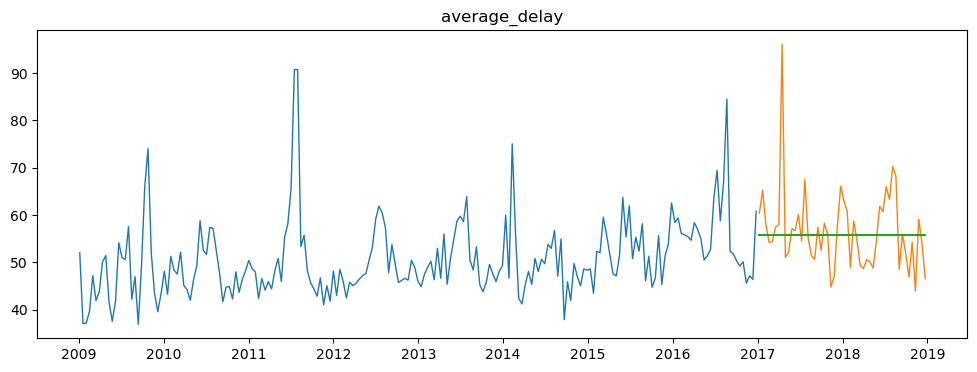

,model_type,target_var,rmse
0,holts_linear_trend,average_delay,8.36


In [85]:
eval_df = model.holt_linear(train, validate, yhat_df, eval_df)
eval_df

### Holt's Seasonal Trend

average_delay -- RMSE: 8


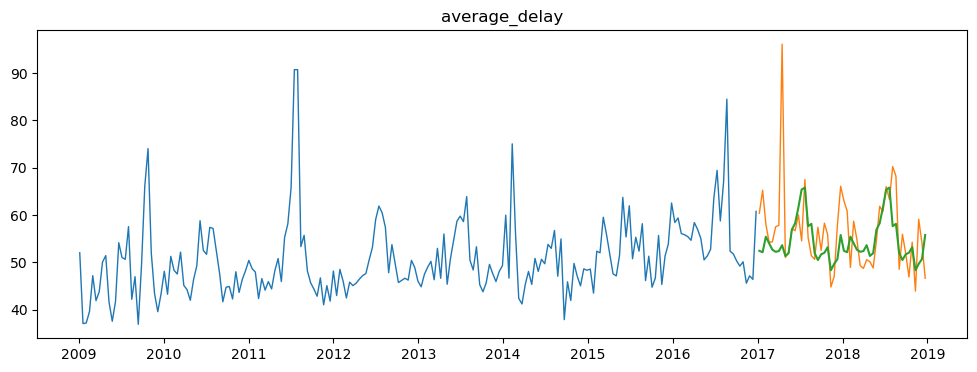

,model_type,target_var,rmse
0,holts_linear_trend,average_delay,8.36
0,holts_seasonal,average_delay,8.10


In [86]:
eval_df = model.holts_average_delay(train, validate, yhat_df, eval_df)
eval_df

### Previous Cycle

average_delay -- RMSE: 9


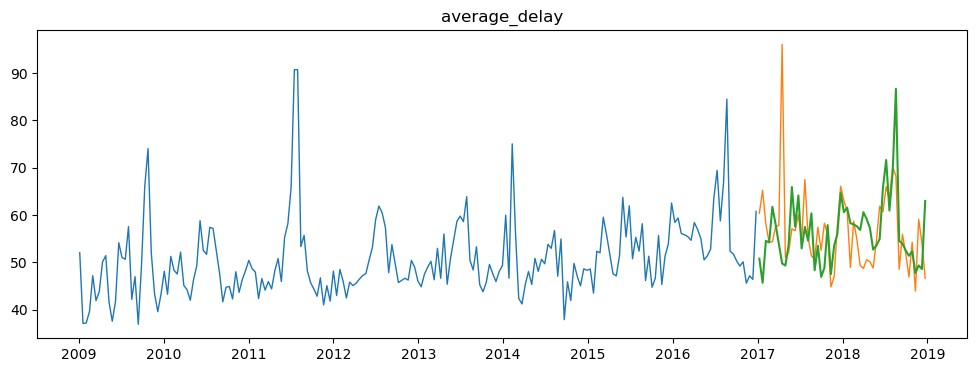

,model_type,target_var,rmse
0,holts_linear_trend,average_delay,8.36
0,holts_seasonal,average_delay,8.10
0,previous 2 years,average_delay,9.35


In [87]:
eval_df = model.previous_period(train, validate, yhat_df, eval_df)
eval_df

#### Best rmse: 8.10 minutes --- Delta: .22 minutes 

###  There seems to be no overfitting here the best model is Holt's Seasonal with Dampening

## Test

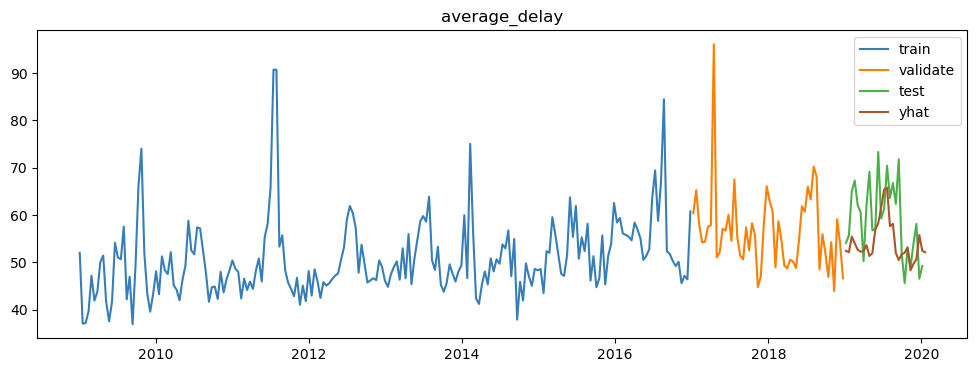

In [88]:
yhat_df = model.final_plot('average_delay', train, validate, test, yhat_df)

In [89]:
test, yhat_df = model.final_rmse(test, yhat_df)

FINAL PERFORMANCE OF MODEL ON TEST DATA
rmse-sales total:  8.623853243587368


### Forecast

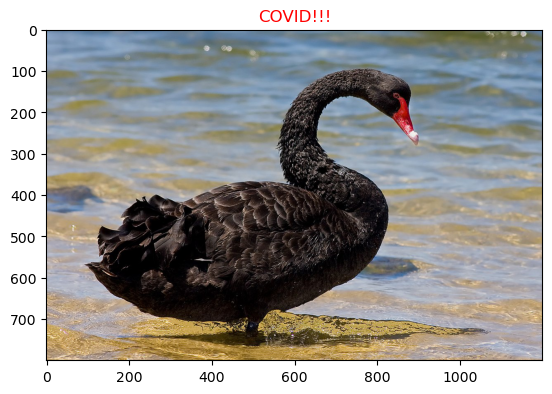

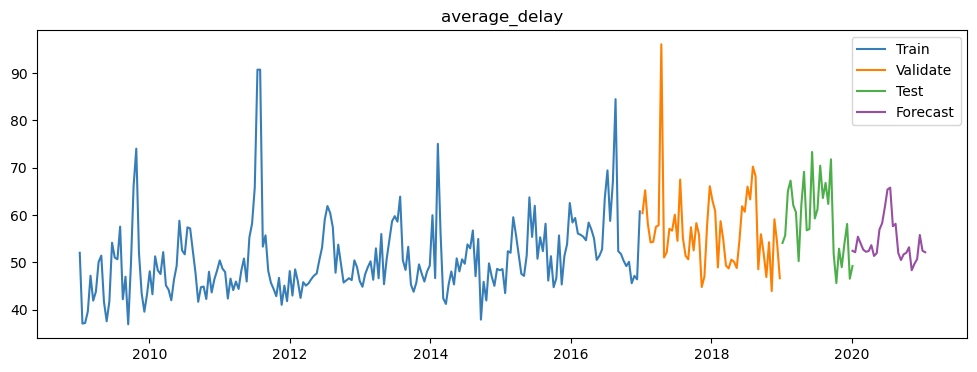

,average_delay
2020-01-05,52.432032
2020-01-19,52.133714
2020-02-02,55.421243
2020-02-16,54.030232
2020-03-01,52.665722


In [90]:
forecast = model.forecast_plot('average_delay', train, validate, test, yhat_df)
forecast.head()

# Conclusions
* There is a clear seasonality to the delays
* Our rmse jumped over baseline for all Airlines despite great performance on train and validate.
* The seasonal trend IS useful and can inform expected delays given the time of the year.
* Even the best models couldn't predict COVID!!!
* Covid started in 2019 and started to affect international flights in December. This may explain the result.
* Summer of 2011 had a massive delay spike for every ariline.
* 2013 showed the lowest point in the trendline

## Next steps

### Another look at trends and residuals

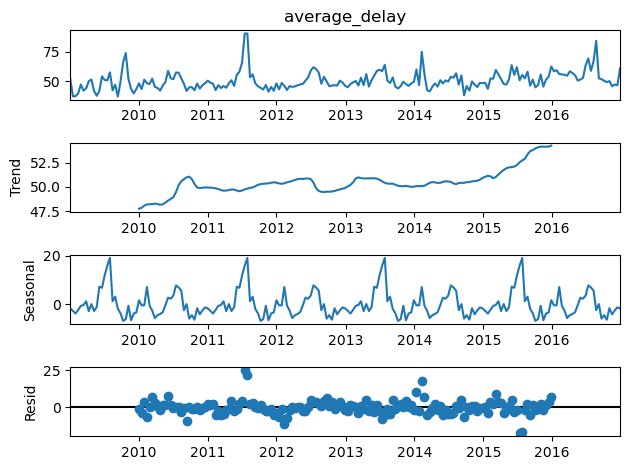

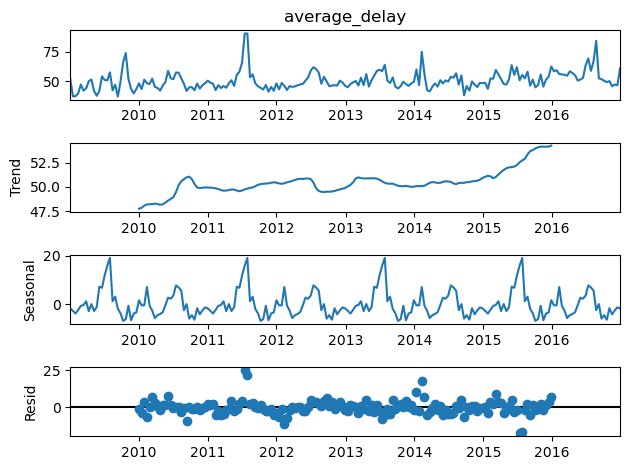

In [92]:
sm.tsa.seasonal_decompose(train['average_delay']).plot()

### Carrier/Maintenance, NAS, Military/Airshow, Accident, Presidential, Natural Disaster all take a back seat to WEATHER!
* Upload historical METAR (hourly weather observations for pilots) data for all airports and append proper info based on departure and destination airports and append appropriately to the individual observations
* Focus on winds, precipitation (amount and type), barometric pressure, visibility and cloud cover as features to predict residuals i.e. the day to day or week to week divergence from the seasonal trend in an ensemble model
* Try out FB prophet and XG Boost as well as Neural Networks
* Finish automating the best model selection
* Anomoly Detection on Residuals